In [1]:
%matplotlib notebook
# %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import axs

# import mysql.connector as mariadb

In [2]:
import matplotlib
matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
def spark_start(local_dir):
    from pyspark.sql import SparkSession
    
    spark = (
            SparkSession.builder
            .appName("LSD2")
            .config("spark.sql.warehouse.dir", local_dir)
            .config('spark.master', "local[6]")
            .config('spark.driver.memory', '8G') # 128
            .config('spark.local.dir', local_dir)
            .config('spark.memory.offHeap.enabled', 'true')
            .config('spark.memory.offHeap.size', '4G') # 256
            .config("spark.sql.execution.arrow.enabled", "true")
            .config("spark.driver.maxResultSize", "6G")
            .config("spark.driver.extraJavaOptions", f"-Dderby.system.home={local_dir}")
            .enableHiveSupport()
            .getOrCreate()
                    )   

    return spark


In [4]:
spark_session = spark_start('/epyc/users/jrad/ztf_alertCMD/sparkler/')

In [5]:
catalog = axs.AxsCatalog(spark_session)

In [6]:
catalog.list_tables().keys()

dict_keys(['sdss_zoned1am_hd', 'gaia_zoned1am_hd', 'gaia_dr2_1am_dup', 'sdss_zoned1am_700lc', 'gaia_dr2_700lc2', 'allwise_1am_dup', 'gaia_sdss_wise_1asec', 'gaia_sdss_3asec', 'ztf_1am_old', 'ztf_exposures', 'ztf_1am_lc', 'ztf_1am', 'ztf_1am_test', 'sesar_rrlyrae', 'ztf_fid1_sdss_stars_lt20_2asec', 'ztf_fid2_sdss_stars_lt20_2asec', 'ztf_fid3_sdss_stars_lt20_2asec', 'sdss_dr9_qso_s82', 'faraway_training_dataset', 'faraway_labeled_training_dataset', 'ztf_nobs100', 'jnk_ztf_test', 'jnk_ztf_test2', 'ztf1000', 'ztf10', 'ztf_dec18', 'asassn_variability_catalog', 'ztf10_assasn', 'ztf10_assasn_cesium', 'ztf10_assasn_best', 'ztf10_assasn_cesium_best', 'unwise_v1', 'cklein_flare', 'unwise_v2', 'cesium_speedtest_ztfsample', 'paula_listcvs', 'nemec_rrlyrae_metalicity', 'dambis_rrlyrae_metalicity', 'sdss_500b_28e_10800z', 'gaia_500b_28e_10800z', 'allwise_500b_28e_10800z', 'ztf_500b_28e_10800z', 'ztf_mar19_all', 'ztf_dr1_s82_qso', 'green19_stellar_params', 'catalina_variables_n', 'caltech_rosat_perio

In [23]:
catalog.load('ztf_aug19').count()

180861392

In [24]:
catalog.load('ztf_mar19_all').count()

1426436371

In [25]:
ztf = catalog.load('ztf_aug19')

In [27]:
x,y,z = ztf.histogram2d(ztf['ra'], ztf['dec'], 1000, 1000)

/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


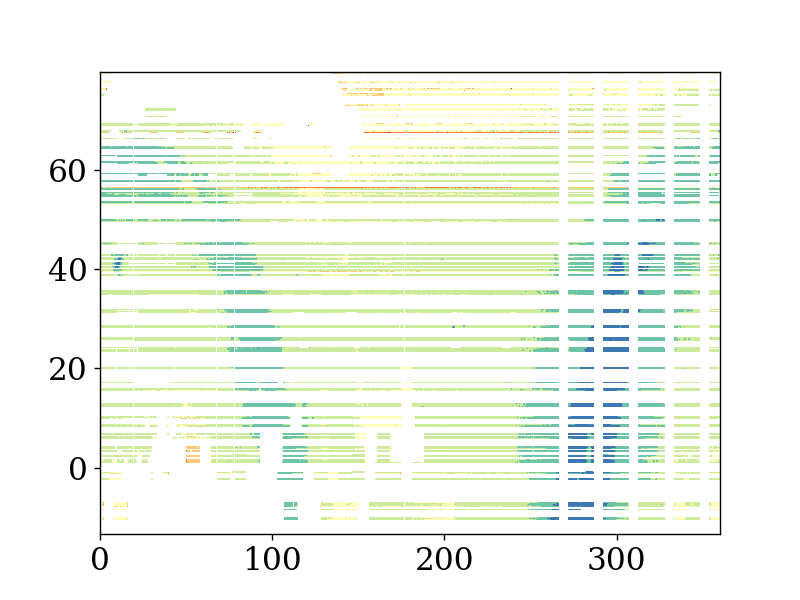

In [32]:
plt.contourf(x,y,np.log10(z), cmap=plt.cm.Spectral)

In [33]:
ztf_mar = catalog.load('ztf_mar19_all')

In [46]:
%%time
x,y,z = ztf_mar.histogram2d(ztf_mar['ra'], ztf_mar['dec'], 1100, 900)

CPU times: user 18.1 s, sys: 933 ms, total: 19 s
Wall time: 1min 5s


<IPython.core.display.Javascript object>


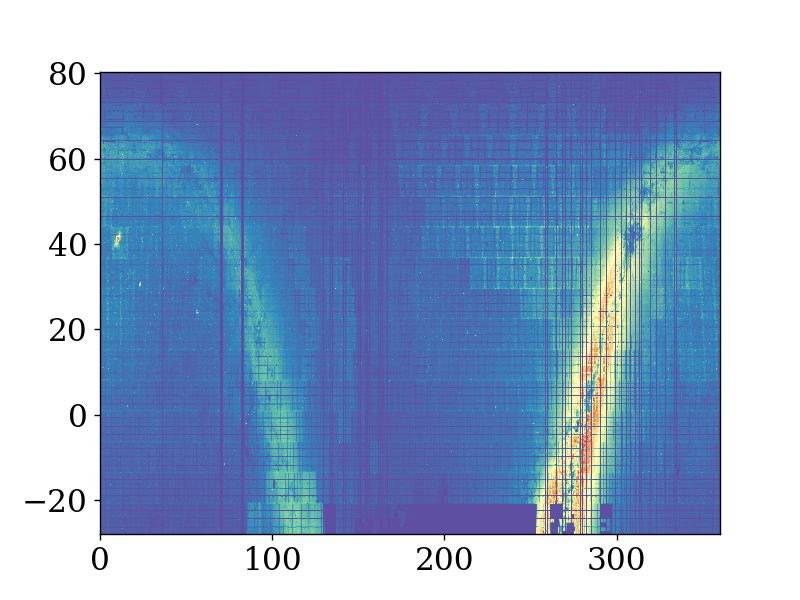

In [47]:
plt.pcolormesh(x,y,z, cmap=plt.cm.Spectral_r)

In [55]:
# ztf_mar.columns

In [ ]:
x,y,z = ztf_mar.histogram2d(ztf_mar['mag'], ztf_mar['magerr'], 1100, 900)

In [ ]:
plt.pcolormesh(x,y,z, cmap=plt.cm.Spectral_r)

In [11]:
gaia = catalog.load('gaia_dr2_1am_dup')
# gaia = catalog.load('gaia_dr2_bailer_jones_distances')

In [14]:
# gaia.columns
gaia.count()

1833997578

In [15]:
# gaia_match = ztf.region(ra1=testra-d, ra2=testra+d, dec1=testdec-d, dec2=testdec+d).crossmatch(gaia).select(
#     "matchid","ra","dec","source_id","bp_rp", "phot_g_mean_mag", "axsdist").toPandas()

In [48]:
mtch = ztf_mar.crossmatch(gaia)

In [51]:
# mtch.columns